In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
life_exp = pd.read_csv('/content/lifeexpectancy.csv')
life_exp.shape

(2938, 22)

In [3]:
life_exp.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
life_exp = life_exp.dropna()
life_exp.shape

(1649, 22)

In [5]:
Status = pd.get_dummies(life_exp['Status']) 

In [6]:
life_exp = pd.concat([life_exp,Status], axis = 1)

In [7]:
life_exp.shape

(1649, 24)

In [8]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [9]:
life_exp.rename(columns = {'Life expectancy':'life_expect','thinness 1-19 years':'thin(1-19)','thinness 5-9 years':'thin(5-9)','Income composition of resources':'ICOR'},inplace = True)

In [10]:
corr = life_exp.corr()

<Axes: >

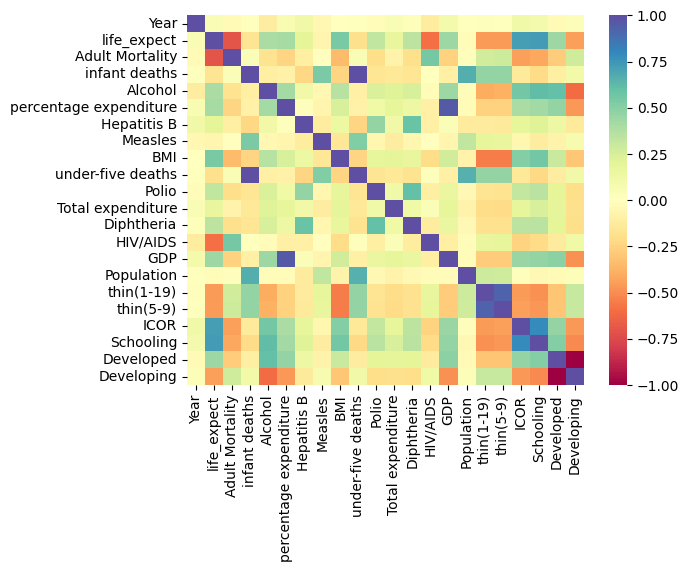

In [11]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='Spectral')

In [15]:
life_exp.corr()

,Year,life_expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thin(1-19),thin(5-9),ICOR,Schooling,Developed,Developing
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,...,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732,-0.034138,0.034138
life_expect,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,...,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630,0.442798,-0.442798
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,...,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171,-0.278173,0.278173
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,...,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372,-0.108757,0.108757
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,...,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975,0.607782,-0.607782
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,...,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088,0.461688,-0.461688
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,...,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182,0.140351,-0.140351
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,...,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660,-0.071963,0.071963
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,...,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844,0.298380,-0.298380
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,...,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013,-0.109847,0.109847


In [16]:
feature = life_exp[['Adult Mortality','Alcohol','percentage expenditure','BMI','HIV/AIDS','GDP','thin(1-19)','thin(5-9)','ICOR','Schooling','Developed','Developing']]
target = life_exp['life_expect']

In [25]:
print(feature.columns)

Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'BMI',
       'HIV/AIDS', 'GDP', 'thin(1-19)', 'thin(5-9)', 'ICOR', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(X_train)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_scaled, y_train)

print(lr.coef_, lr.intercept_)

[-2.20454599 -0.73887415  0.80352801  0.51774883 -2.68919809 -0.10817445
 -0.39674369 -0.08461986  1.75739303  3.05851409  0.16965306 -0.16965306] 69.09116117850952


In [20]:
x_test_scaled = scale.transform(X_test)
reg_test = lr.predict(x_test_scaled)

In [21]:
from sklearn import metrics
print('MAE For Test:', metrics.mean_absolute_error(y_test, reg_test))
print('MSE For Test:', metrics.mean_squared_error(y_test, reg_test))
print('r2 For Test:', metrics.r2_score(y_test, reg_test))

MAE For Test: 2.969742608619434
MSE For Test: 14.896870278263243
r2 For Test: 0.8114286234718783


In [30]:
MAET = metrics.mean_absolute_error(y_test, reg_test)
MSET = metrics.mean_squared_error(y_test,reg_test)
R2T = metrics.r2_score(y_test, reg_test)

In [22]:
reg_train = lr.predict(x_scaled)

In [23]:
print('MAE For Train:', metrics.mean_absolute_error(y_train, reg_train))
print('MSE For Train:', metrics.mean_squared_error(y_train, reg_train))
print('r2 For Train:', metrics.r2_score(y_train, reg_train))

MAE For Train: 2.806834180527311
MSE For Train: 13.335294980934982
r2 For Train: 0.825628357324256


In [31]:
MAE = metrics.mean_absolute_error(y_train, reg_train)
MSE = metrics.mean_squared_error(y_train, reg_train)
R2 = metrics.r2_score(y_train, reg_train)

In [34]:
result = pd.DataFrame({'MAE':[MAET,MAE],'MSE':[MSET,MSE],'r2':[R2T,R2]})
result.index = ['Test','Train']
print(result)

            MAE        MSE        r2
Test   2.969743  14.896870  0.811429
Train  2.806834  13.335295  0.825628
